In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import yaml
#from dotenv import load_dotenv

import Mandelbrot #defined/customized functions from Mandelbrot.py

import scipy
from scipy.stats import norm, cauchy, lognorm, expon, kstest


In [7]:
# Load DF
MIN, HOUR, DAY, WEEK, MONTH = Mandelbrot.historical_datasets(crypto="BTC", curr="EUR")


downloading the EUR price/m for BTC from https://www.cryptodatadownload.com/cdd/Binance_BTCEUR_minute.csv....
downloading the EUR price/m for BTC from yfinance....
merge dataframes
downloading the EUR price/d for BTC from https://www.cryptodatadownload.com/cdd/Binance_BTCEUR_d.csv....
downloading the EUR price/d for BTC from yfinance....
merge dataframes


/home/christiane/git/MOM_Crypto_Bot/agent/Mandelbrot.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HOUR["delta_high"] = HOUR["high"].diff()
/home/christiane/git/MOM_Crypto_Bot/agent/Mandelbrot.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HOUR["delta_low"] = HOUR["low"].diff()
/home/christiane/git/MOM_Crypto_Bot/agent/Mandelbrot.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [8]:
df = DAY

### 1. Index vs delta index / raw vs logarithm

The logarithm of the deltas gives a more informative picture than the raw index values.
-> shows the growth in relation to the overall data and suposible bull runs seem less impressive 



## Thesis 1: Logarithm Charts represents the market behaviour more truthfully

[nan, -0.775472401825323, -1.3903820901528157, 0.018395825412386844, -0.9280712049099684, -0.7020340092541884, 1.4351315257544577, -0.6431386932936758, -0.8955818974327147, -0.7856994752680366, -0.6729722796761102, -0.6454625680667018, -1.1119886393849179, 0.7989377052056565, -0.1790302300970597, -0.7428640204084518, -0.7274168438497168, -0.9092324682842888, -1.2583270051560773, 0.16332330105826953, -0.7598683313756112, 0.9680203933935947, 1.372628417807508, -0.8068458715856465, -0.6493845420710055, 0.964759727306535, 1.0746280377912483, 1.0754709970521277, -0.7576208186627478, -0.8648047340287508, -0.9343461620762555, 0.8801263021690886, 0.019739126645791978, -0.4626894796086034, 0.4008776549969668, -0.4673096047509613, 0.07906462988696183, -1.2400582824062563, -0.5111241831906165, 0.29662569628231555, -0.15971409628106262, 0.07812408903784292, -0.35976185776213193, -0.44225789375939917, -0.3219490893823046, -0.6248475090486121, -0.962161795457887, 0.6877815501057606, -0.4038164852680

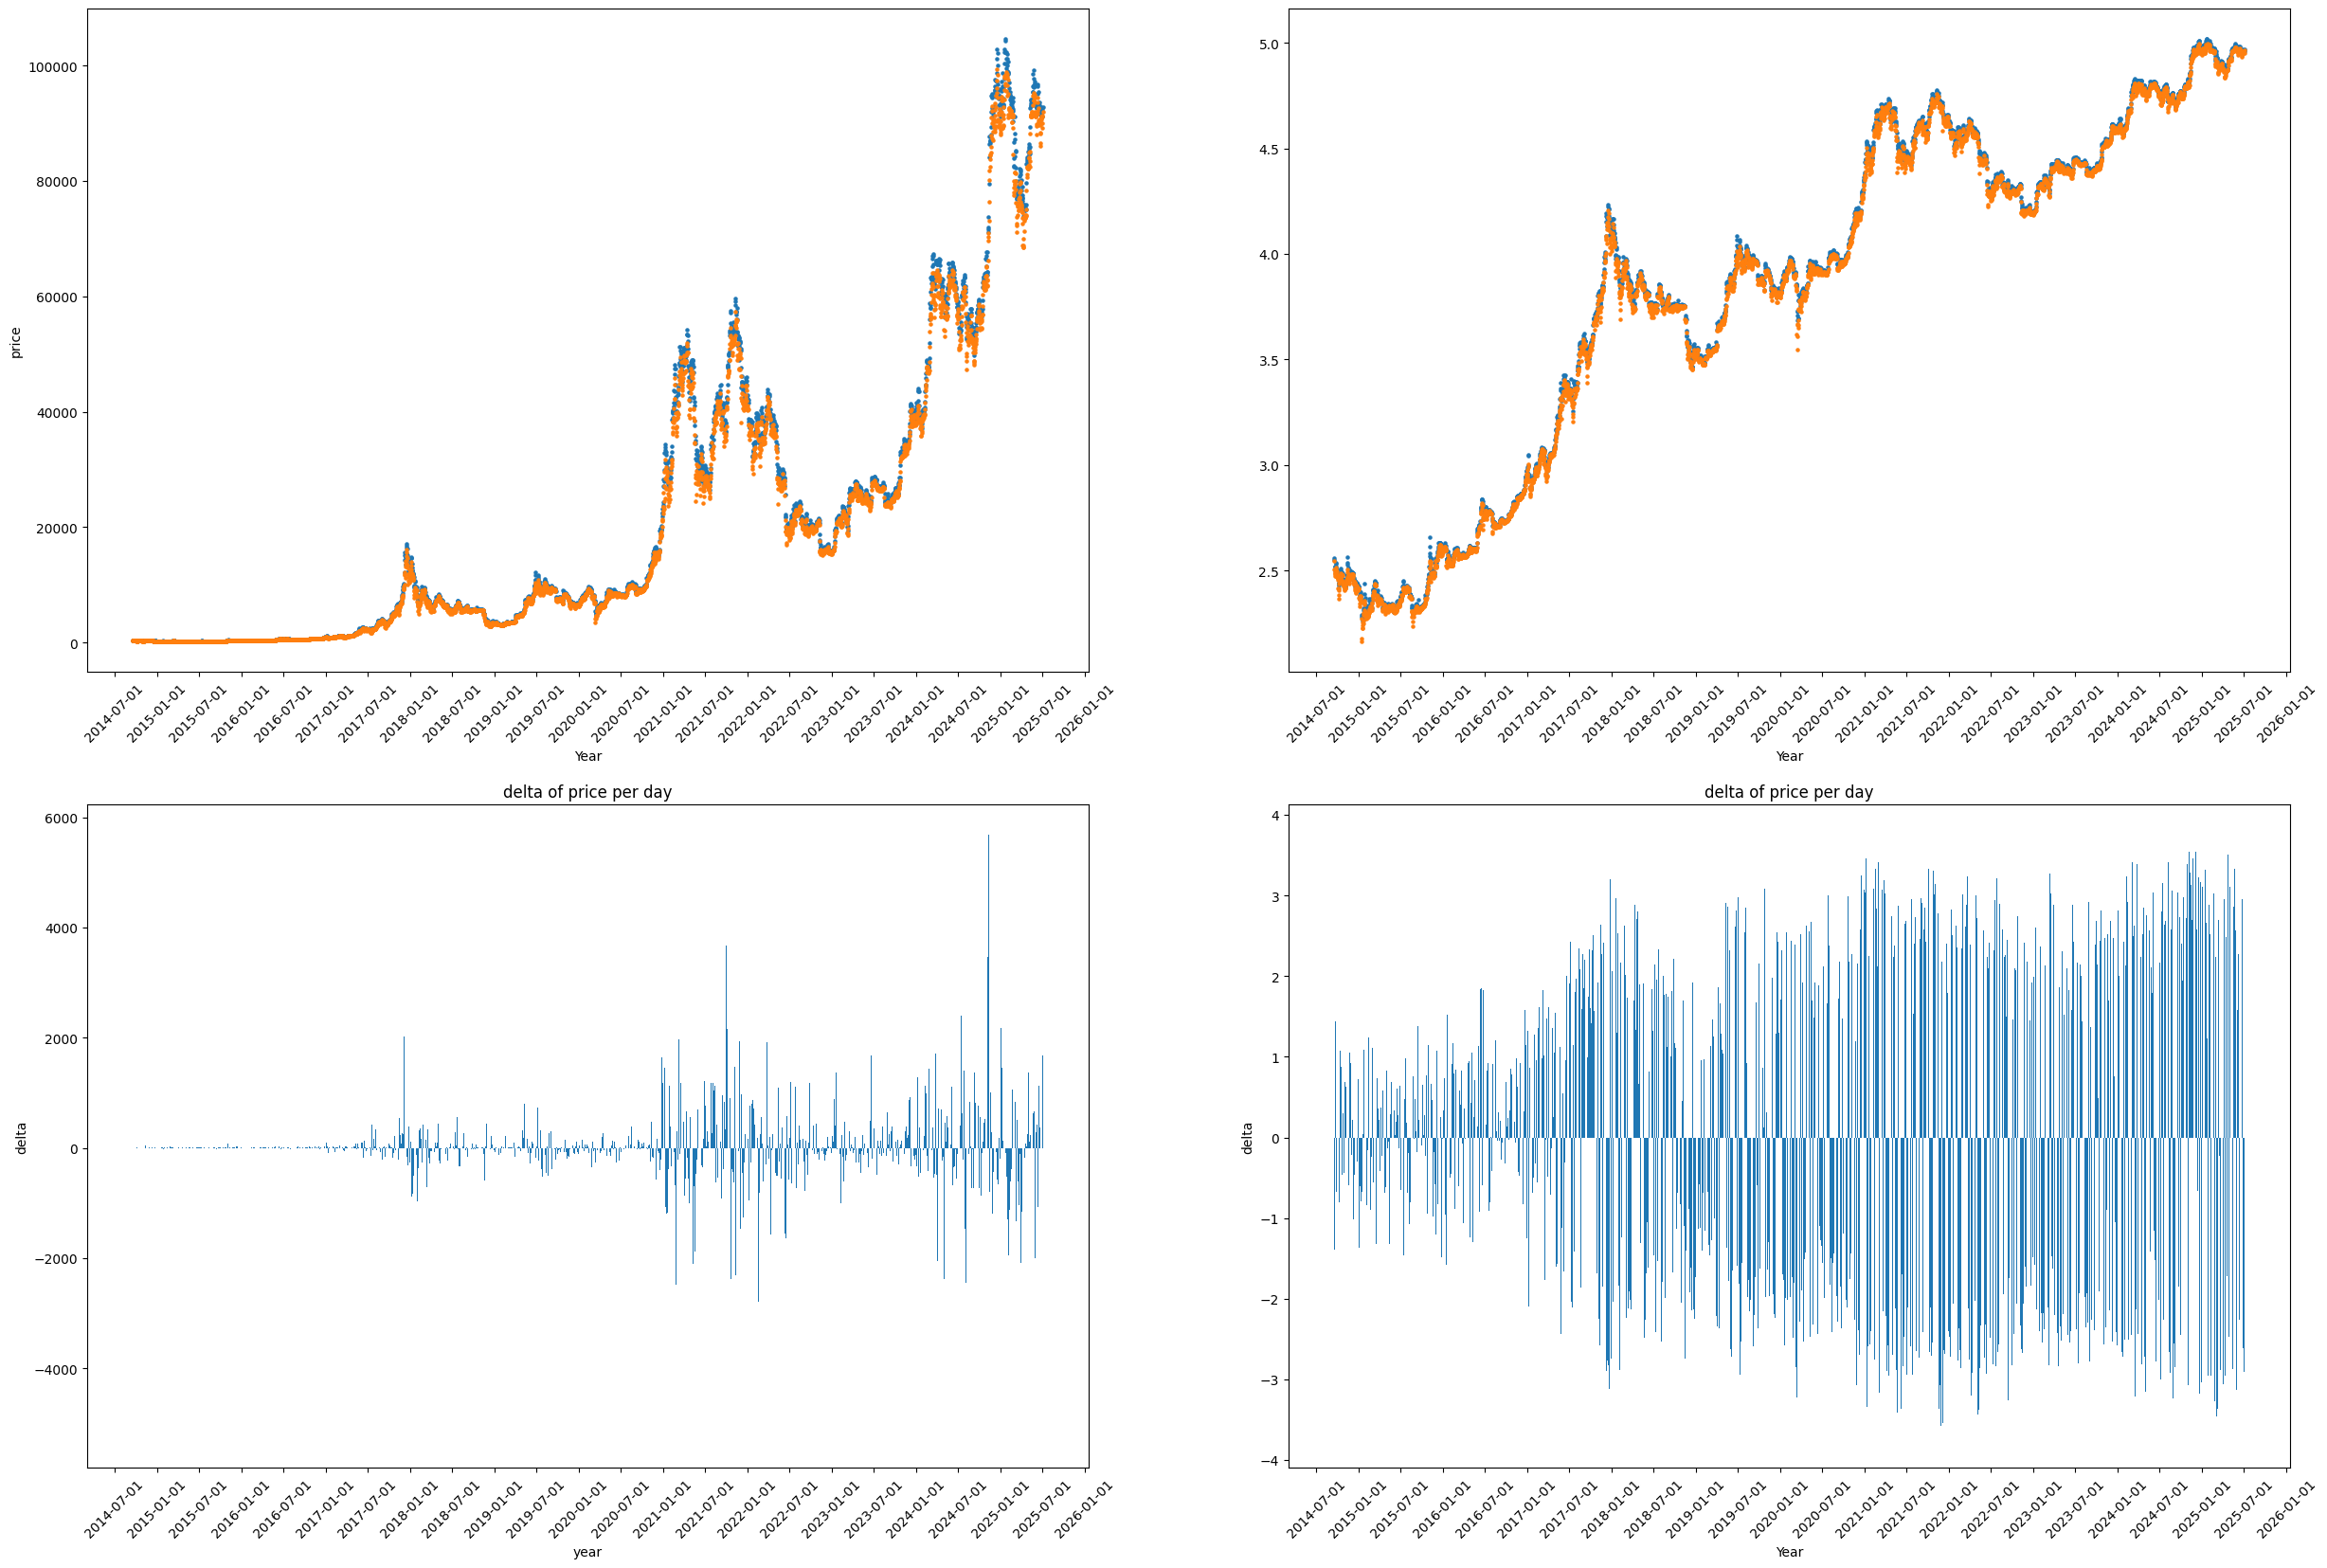

In [6]:
fig = plt.figure(figsize=(30,20))


plt.subplot(2, 2, 1)

plt.scatter(df["date"], df["high"], s=5, label="high")
plt.scatter(df["date"], df["low"], s=5, label="low")
#x-axis format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(bymonth=(1,7)))

#rotate x axis
plt.xticks(rotation=45)
plt.xlabel("Year")

plt.ylabel("price")




plt.subplot(2, 2, 2)
plt.scatter(df["date"], Mandelbrot.log10(df["high"]), s=5, label="high")
plt.scatter(df["date"], Mandelbrot.log10(df["low"]), s=5, label="low")

#x-axis format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(bymonth=(1,7)))

#rotate x axis
plt.xticks(rotation=45)
plt.xlabel("Year")





plt.subplot(2, 2, 3)
plt.bar(df["date"], df["delta_high"])
 
plt.xlabel("year")
plt.ylabel("delta")
#x-axis format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(bymonth=(1,7)))

#rotate x axis
plt.xticks(rotation=45)
plt.title("delta of price per day")



print(Mandelbrot.log10(df["delta_high"])[0:50])

plt.subplot(2, 2, 4)
plt.bar(df["date"], Mandelbrot.log10(df["delta_high"]))

 
plt.xlabel("Year")
plt.ylabel("delta")
#x-axis format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(bymonth=(1,7)))

#rotate x axis
plt.xticks(rotation=45)
plt.title("delta of price per day")

plt.show()

### Probability density function of delta values

it is widely accepted, that the values follow a normal distribution

Mandelbrot suggests, that it is rather a Cauchy distribution

Cauchy:
-> higher peak around the mean
-> no fixed variance
-> more considerate of frequent "higher" outliers (turbulences in the market)


When to Use Cauchy Instead of Gaussian?

Choose Cauchy if:

    You see extreme outliers

    Data has heavy tails (outliers that don't “go away” with more samples)

    Mean and variance don't make sense (or are misleading)

Choose Gaussian if:

    Data clusters well around a central value

    Tails decay quickly (no big outliers)

## Thesis 2 The PDF follows a Cauchy distribution

#How is it tested?

The delta values are plotted (Histogramm)
Different PDFs are calculated (norm, cauchy etc)

--> what is the best way to evaluate the  best fit?
Kolmogorov



In [9]:
import seaborn as sb
from pathlib import Path

distdict = yaml.safe_load(Path('static/dist_color.yml').read_text())

print(distdict)

{'cauchy': 'pink', 'expon': 'r', 'lognorm': 'g', 'norm': 'k'}


In [16]:
#Analyzing how the fit works (for Gauss)

data = MONTH["delta_high"].dropna()

#getattr?
dist = getattr(scipy.stats, "norm") #creates an object according to the parameters
#print(dist)
params = dist.fit(data,method="mle") #fits the given pdf to the data via MLE

print(params)

arg = params[:-2]
loc = params[-2]
scale = params[-1]


print("arg:",arg)
print("loc:",loc)  #sigma (variance) for gauss
print("scale:",scale) #mu (mean) for gauss

x = np.linspace(scale - 3*loc, scale + 3*loc, 100)
print("testdata")
print(x)

def gauss_pdf(x, mu, sigma):
   
    Gauss_data = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    
    return Gauss_data


print("Guass Data:")
print(gauss_pdf(x,scale,loc))

(710.5827306845022, 5067.084930787807)
arg: ()
loc: 710.5827306845022
scale: 5067.084930787807
testdata
[2935.33673873 2978.40235878 3021.46797882 3064.53359886 3107.5992189
 3150.66483894 3193.73045898 3236.79607902 3279.86169907 3322.92731911
 3365.99293915 3409.05855919 3452.12417923 3495.18979927 3538.25541932
 3581.32103936 3624.3866594  3667.45227944 3710.51789948 3753.58351952
 3796.64913956 3839.71475961 3882.78037965 3925.84599969 3968.91161973
 4011.97723977 4055.04285981 4098.10847985 4141.1740999  4184.23971994
 4227.30533998 4270.37096002 4313.43658006 4356.5022001  4399.56782014
 4442.63344019 4485.69906023 4528.76468027 4571.83030031 4614.89592035
 4657.96154039 4701.02716044 4744.09278048 4787.15840052 4830.22402056
 4873.2896406  4916.35526064 4959.42088068 5002.48650073 5045.55212077
 5088.61774081 5131.68336085 5174.74898089 5217.81460093 5260.88022097
 5303.94584102 5347.01146106 5390.0770811  5433.14270114 5476.20832118
 5519.27394122 5562.33956126 5605.40518131 56

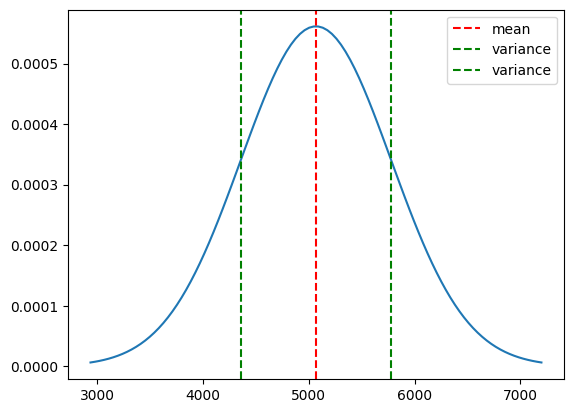

In [21]:
#reconstructing Gauss from fit
plt.plot(x, gauss_pdf(x,scale,loc))
plt.axvline(scale, color='red', linestyle='--', label='mean')
plt.axvline(scale-loc, color='green', linestyle='--', label='variance')
plt.axvline(scale+loc, color='green', linestyle='--', label='variance')
plt.legend()
plt.show()

In [28]:
#analyze fit for cauchy

dist = getattr(scipy.stats, "cauchy") #creates an object according to the parameters
#print(dist)
params = dist.fit(data,method="mle") #fits the given pdf to the data via MLE

print(params)

arg = params[:-2]
loc = params[-2]
scale = params[-1]


print("arg:",arg)
print("loc:",loc)  #x0 (peak value) for cauchy
print("scale:",scale) #gamma (the distance from the peak x0 where the PDF drops to half its maximum value) for cauchy

x = np.linspace(loc - 5*scale, loc + 5*scale, 500)

def cauchy_pdf(x,x0,gamma):
    
    Cauchy_data = 1 / (np.pi * gamma * (1 + ((x - x0)/gamma)**2))
    
    return Cauchy_data


(72.1785187923022, 1073.44949476017)
arg: ()
loc: 72.1785187923022
scale: 1073.44949476017


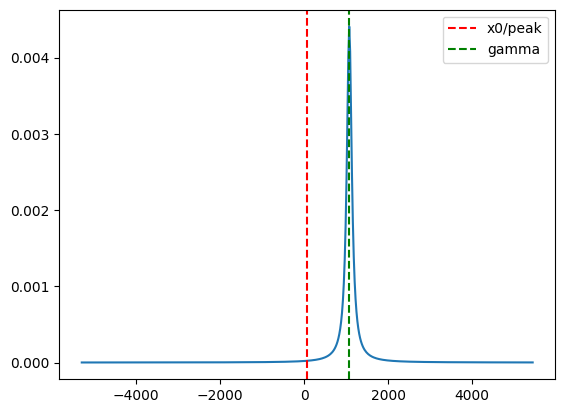

In [29]:
#reconstructing Cauchy from fit
plt.plot(x, cauchy_pdf(x,scale,loc))
plt.axvline(loc, color='red', linestyle='--', label='x0/peak')
plt.axvline(scale, color='green', linestyle='--', label='gamma')
#plt.axvline(scale+loc, color='green', linestyle='--', label='variance')
plt.legend()
plt.show()

In [36]:
# how to determine which fit is the best?

#GAUSS
#gauss_dist = getattr(scipy.stats, "gauss") #creates an object according to the parameters
#print(dist)
gauss_params = scipy.stats.norm.fit(data,method="mle")

#CAUCHY
#cauchy_dist = getattr(scipy.stats, "cauchy") #creates an object according to the parameters
#print(dist)
cauchy_params = scipy.stats.cauchy.fit(data,method="mle")


#Log Likelihood
#---> Compares how well the Model fits
#higher == better
loglik_gauss = np.sum(norm.logpdf(data, *gauss_params))
loglik_cauchy = np.sum(cauchy.logpdf(data, *cauchy_params))

print(f"Log-likelihood (Gauss): {loglik_gauss}")
print(f"Log-likelihood (Cauchy): {loglik_cauchy}")


#Akaikon Information Criterion (AIC)
#uses Loglikelihood values
#-> for models of different complexity (different amount of parameters)
#AIC helps you avoid being tricked by a model that fits well only because it's more complex
#lower == better

def aic(loglik, num_params):
    return 2 * num_params - 2 * loglik

aic_norm = aic(loglik_norm, 2)
aic_cauchy = aic(loglik_cauchy, 2)

print(f"AIC (Gauss): {aic_norm}")
print(f"AIC (Cauchy): {aic_cauchy}")

#Bayesian Information Criterion (BIC)


#Cramer von Mises
#More balanced than Anderson or KS: cares about both center and tails
#smaller == better
cvm_gauss = scipy.stats.cramervonmises(data, 'norm')
cvm_cauchy = scipy.stats.cramervonmises(data, 'cauchy')

print(f"CVM (Gauss): {cvm_gauss}")
print(f"CVM (Cauchy): {cvm_cauchy}")

#Kolmogorov Smirnov ->>> not suitable/ limited
# anderson ---> not suitable for cauchy

scipy.stats.cramervonmises?

Log-likelihood (Gauss): -1283.4802755119795
Log-likelihood (Cauchy): -1237.3563776727024
AIC (Gauss): 2570.960551023959
AIC (Cauchy): 2478.7127553454047
CVM (Gauss): CramerVonMisesResult(statistic=11.27312062988594, pvalue=3.4848057772762786e-10)
CVM (Cauchy): CramerVonMisesResult(statistic=10.947740469079005, pvalue=1.9998869227322302e-10)


In [ ]:
# GAUSS FIT
from scipy.stats import norm, cauchy, lognorm, expon, kstest
data = MONTH["delta_high"].dropna()

#plt.hist(data, bins=100, density=True)

plt.figure(figsize=(15,10))

sb.histplot(data, bins=100, kde=False, stat = "density", color = 'blue', alpha=0.6)


    
params, pdf_fitted, x, cvm = Mandelbrot.gauss_pdf(data)

    
plt.plot(x,pdf_fitted, 
         distdict["norm"], 
         linewidth=2, 
         label=pdf)
plt.figtext(0.6, 1,  
                'CVM=%.2f p-value=%.2f'%(CVM,
                                        cvm[1]), 
                size=14, 
                c=distdict["norm"])


#plt.legend(loc="upper right")
plt.xlabel('Delta')
plt.ylabel('Density')
plt.title('Fitted PDFs')
#plt.savefig("PDF.png")
plt.show()

# 3. The memory of data

## old patterns correlate with newer patterns

## Hurt exponent / Variance